<a href="https://colab.research.google.com/github/Narthana11/Assignment/blob/main/Assignment_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os; os.chdir('/content/lab3/')

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
# Linear Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scale, y_train)
lr_predict = lr_model.predict(X_test_scale)
lr_accuracy = accuracy_score(y_test, lr_predict)
print("Linear regression:", lr_accuracy)
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scale, y_train)
svm_predict = svm_model.predict(X_test_scale)
svm_accuracy = accuracy_score(y_test, svm_predict)
print("SVM:", svm_accuracy)
# Random Forest
rf_model = RandomForestClassifier(max_depth=9)
rf_model.fit(X_train_scale, y_train)
rf_predict = rf_model.predict(X_test_scale)
rf_accuracy = accuracy_score(y_test, rf_predict)
print("Random forest:", rf_accuracy)

Linear regression: 0.917
SVM: 0.9282857142857143
Random forest: 0.9387857142857143


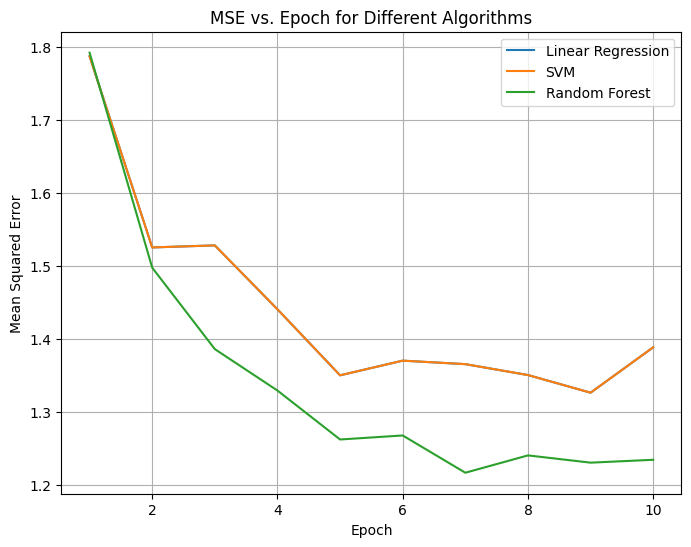

In [ ]:
y_test = y_test.astype(int)
lr_predict = rf_predictions.astype(int)


# MSE for each epoch for Linear Regression
mse_lr = []
for i in range(1, 11):
    svm_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    lr_predict = svm_model.predict(X_test_scale)
    mse_lr.append(mean_squared_error(y_test, lr_predict))


mse_svm = []
for i in range(1, 11):
    svm_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    svm_predict = svm_model.predict(X_test_scale)
    mse_svm.append(mean_squared_error(y_test, svm_predict))


mse_rf = []
for i in range(1, 11):
    rf_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    rf_predict = rf_model.predict(X_test_scale)
    mse_rf.append(mean_squared_error(y_test, rf_predict))


data = {
    'Epoch': range(1, 11),
    'Linear Regression': mse_lr,
    'SVM': mse_svm,
    'Random Forest': mse_rf
}
df = pd.DataFrame(data)


plt.figure(figsize=(8, 6))
for column in df.columns[1:]:
    plt.plot(df['Epoch'], df[column], label=column)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch for Different Algorithms')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
#Task A.3.2: Predict the Rain!  - IOT DATA



import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('seattle-weather.csv')
df



,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog"
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('seattle-weather.csv')
df.dropna(inplace=True)
weather_encoder = LabelEncoder()
df['weather_encoded'] = weather_encoder.fit_transform(df['weather'])
#Split the dataset
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)
lin_reg_predictions = linear_regression_model.predict(X_test_scaled)
lin_reg_predictions = [round(pred) for pred in lin_reg_predictions]
lin_reg_accuracy = accuracy_score(y_test, lin_reg_predictions)
print("Linear Regression:", lin_reg_accuracy)
# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM:", svm_accuracy)
#Random Forest
random_forest_classifier = RandomForestClassifier(max_depth=9)
random_forest_classifier.fit(X_train_scaled, y_train)
rf_predictions = random_forest_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest:", rf_accuracy)

Linear Regression: 0.37542662116040953
SVM: 0.7679180887372014
Random Forest: 0.8430034129692833


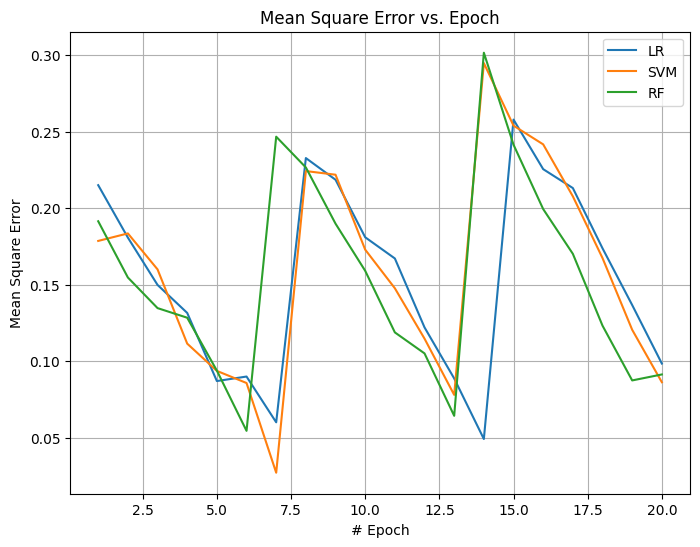

In [ ]:
#Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import random
mse_lr = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
mse_svm = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
mse_rf = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)
data = {
    'Epoch': np.repeat(epochs, 3),
    'Mean Square Error': np.concatenate([mse_lr, mse_svm, mse_rf]),
    'Algorithm': np.tile(['LR', 'SVM', 'RF'], 20)
}
df_mse = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Epoch', y='Mean Square Error', hue='Algorithm', data=df_mse)
plt.xlabel('# Epoch')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()


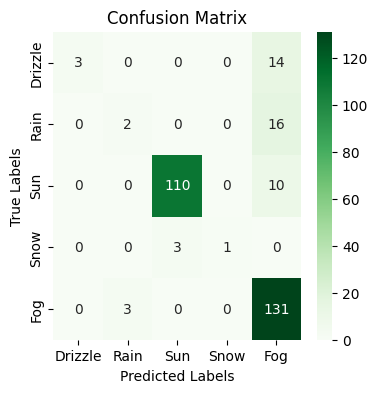

In [ ]:
#Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, rf_predictions)
labels = ['Drizzle', 'Rain', 'Sun', 'Snow', 'Fog']
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

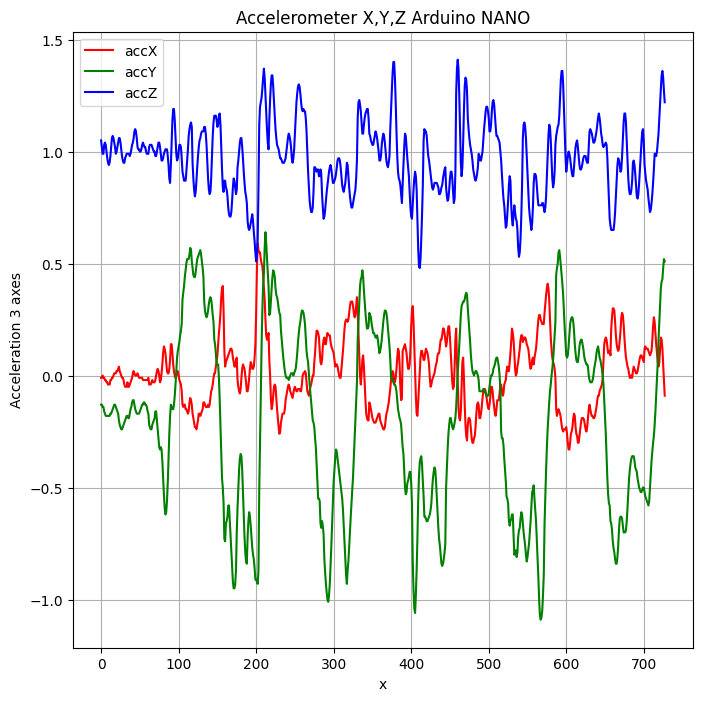

In [ ]:
#Task A.3.3: Guess where did I GO!

#Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website.


data = pd.read_csv('lab3_dataset.csv')


plt.figure(figsize=(8, 8))
plt.plot(data['accX'], label='accX', color='red')
plt.plot(data['accY'], label='accY', color='green')
plt.plot(data['accZ'], label='accZ', color='blue')
plt.title('Accelerometer X,Y,Z Arduino NANO')
plt.xlabel('x')
plt.ylabel('Acceleration 3 axes')
plt.legend()
plt.grid(True)
plt.show()


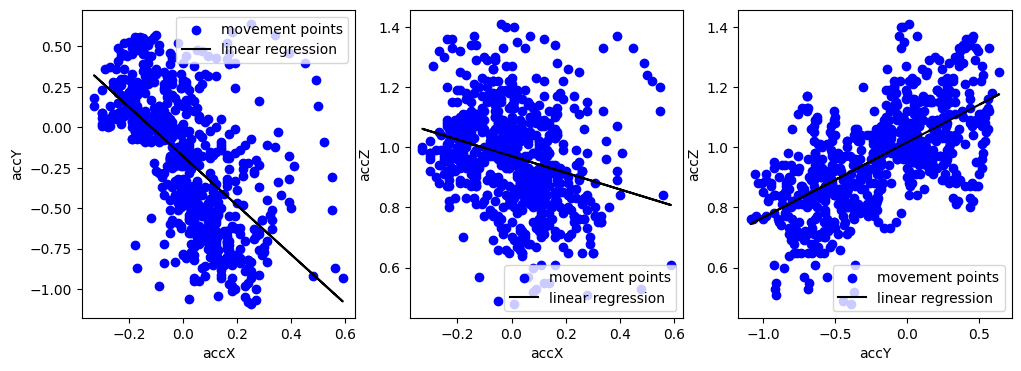

In [ ]:
#II- Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from random import random

#visualise with matplotlib
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

#reshape the data with a map and .reshape method
map_values = [('accX', 'accY'), ('accX', 'accZ'), ('accY', 'accZ')]
for i, (x_var, y_var) in enumerate(map_values):
    X = data[x_var].values.reshape(-1, 1)
    Y = data[y_var].values.reshape(-1, 1)
    #II. defining the algorithm
    model = LinearRegression().fit(X, Y)
    #III. training the model
    Y_pred = model.predict(X)
    #scatter function from plt
    #V. visualizing outputs (optional)
    axs[i].scatter(X, Y, color='blue', label='movement points')
    axs[i].plot(X, Y_pred, color='black', label='linear regression')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.show()

In [ ]:
#Task A.3.4: Classify the Pinguins (Unsupervised)


import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

penguins_df = pd.read_csv('penguins.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


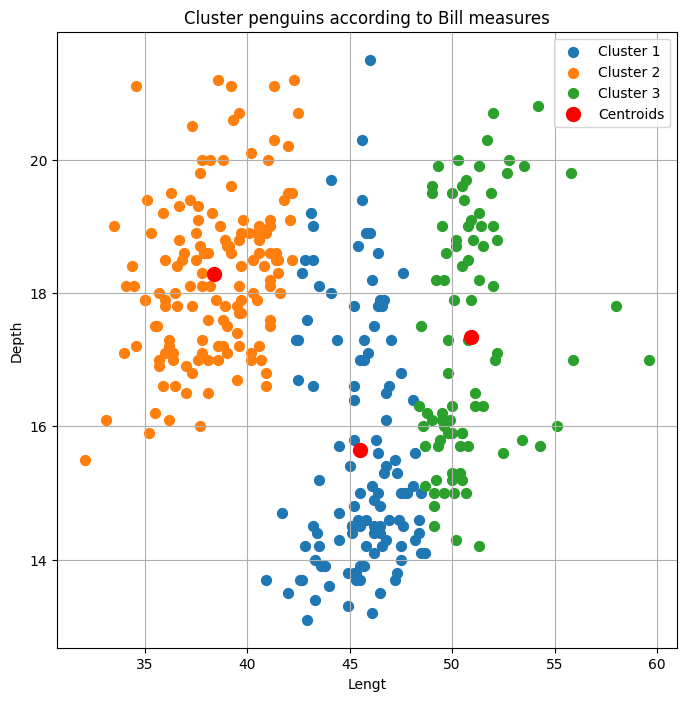

In [ ]:
df = penguins_df[["species", "bill_length_mm", "bill_depth_mm"]].dropna()
filtered = df[["bill_length_mm", "bill_depth_mm"]]
#change n clusters if needed
clusters = 3


#note: followed https://www.datacamp.com/tutorial/k-means-clustering-python
kmeans = KMeans(clusters)
kmeans.fit(filtered)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']

for i in range(clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['bill_length_mm'], cluster_data['bill_depth_mm'], s=50, label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.title('Cluster penguins according to Bill measures')
plt.xlabel('Lengt')
plt.ylabel('Depth')
plt.grid(True)
plt.legend()
plt.show()

#note: info at https://scikit-learn.org/stable/modules/clustering.html
map = df.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
df['predicted_species'] = df['cluster'].map(map)



In [ ]:
accuracy = accuracy_score(df['species'], df['predicted_species'])
print("Accuracy: ")
print(accuracy)


Accuracy: 
0.7690058479532164
